# Project Narrative:

**Introduction**
Fracture energy is a pivotal parameter in the design and service of composite structures, particularly in the realm of nanocomposites. These advanced materials are integral to various industrial applications, yet their effective utilization is often hampered by the intricate nature of their design and analysis.

**Problem Statement**
The determination of fracture energy in nanocomposites is currently marred by inefficiencies and high costs, largely due to the extensive design parameters involved, cumbersome design procedures, and the complexity of simulation models. This not only makes the process expensive but also limits the wider adoption of nanocomposites in industry.

**Proposed Solution**
In response to these challenges, our plan is to leverage machine learning (ML) and deep learning (DL) techniques. By employing these advanced computational methods, we aim to construct a more streamlined, cost-effective approach for analyzing the fracture energy of nanocomposites.

**Methodology**
We will compare several ML and DL methodologies, evaluating them based on their precision, computational efficiency, and practicality in implementation. This comparative study will facilitate the selection of the most suitable approach for our objectives.

**Design Parameters Considered**
Our analysis will encompass a broad spectrum of design parameters: from the types of matrices and their mechanical properties such as strength, modulus, and fracture energy, to the thermal and physical characteristics like the coefficient of thermal expansion and Poisson's ratio. Additionally, we will delve into the specifics of nanoparticles, including their type, strength, modulus, size, thermal expansion coefficient, volume fraction, and the crucial aspect of interface strength between nanoparticles and the matrix.

**Implementation Strategy**
The selected ML/DL methods will be integrated with these diverse design parameters, addressing the complexity and variability of the data involved. This strategy aims to ensure that the computational models developed are both robust and adaptable.

**Expected Outcomes**
We anticipate that this approach will significantly enhance the accuracy of fracture energy determinations in nanocomposites. Furthermore, it promises to reduce the reliance on costly and time-consuming experiments and simulations, potentially paving the way for broader industrial applications of these materials.

**Conclusion**
In sum, this initiative stands to revolutionize the way nanocomposites are analyzed and utilized in industrial settings. By harnessing the power of ML and DL, we are poised to unlock new possibilities in the field of material science, setting the stage for further innovations in nanocomposite research and application.



## Fracture energy of the nanocomposite is one of the most critical parameters for the matrix-dominated composites. However, due to 

Machine learning(ML) provide fast and  accurate predictions of material properties at a low computation cost. Herein, the mechanical properties of epoxy-based nanocomposite reinforced with different concentrations of nanoparticles (e.g., sio2) will be predicted.

## What data do you need? How will you get the data?
**INPUT**The type of nanoparticles, the type of epoxy, the mechanical properties of epoxy matrix, the particle size of the nanoparticles, the volum fraction of the nanoparticles. **OUTPUT** The fracture energy,modulus and strength of the nanocomposite.**Data Source** The data will come from the literature and Wenkai and Saiful's experiments.

# Build the model and compare the results
To build a pipeline that uses several models (Linear Regression, Random Forest, Decision Trees, XGBoost) to predict 'Fracture energy (J/m2)' based on 'Matrix strength (MPa)', 'Matrix modulus (MPa)', 'Particle volume fraction (%)', and 'Particle diameter (nm)', you can follow these steps in Python using libraries like pandas, scikit-learn, and xgboost. The process involves data preparation, model training, evaluation, and comparison. Here's an outline of the steps involved:

1. Data Preparation:

Load your data into a DataFrame.
Split the data into features (X) and target (y).
Split the data into training and test sets.
Model Training:

2. Import the necessary models.
Train each model on the training set.
3. Model Evaluation:

Evaluate each model on the test set using R², MAE, and MSE.
Store the performance metrics for comparison.
Model Comparison:

4. Compare the performance metrics of each model.
Determine the best performing model based on your criteria.
Plotting Predictions:

5. Plot the relationship between the predicted values and the true values for the best performing model.

## 0 Import libraries and data

In [1]:
# Import all the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for square root function
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

%matplotlib inline

In [2]:
# Load your data
df = pd.read_excel('raw_data_version 6.xlsx')
df.columns

Index(['Matrix strength (MPa)', 'Matrix modulus (MPa)',
       'Matrix fracture energy (J/m2)', 'Matrix CTE (E-6/K)',
       'Matrix Poisson's Ratio', 'Particle volume fraction (%)',
       'Particle Modulus (MPa)', 'Particle diameter (nm)',
       'Particle CTE (E-6/K)', 'Particle Poisson's Ratio',
       'Interface fracture energy (mJ/m2)', 'Interface strength (MPa)',
       'Nanocomposite Fracture energy  (J/m2)'],
      dtype='object')

In [3]:
df.head()

,Matrix strength (MPa),Matrix modulus (MPa),Matrix fracture energy (J/m2),Matrix CTE (E-6/K),Matrix Poisson's Ratio,Particle volume fraction (%),Particle Modulus (MPa),Particle diameter (nm),Particle CTE (E-6/K),Particle Poisson's Ratio,Interface fracture energy (mJ/m2),Interface strength (MPa),Nanocomposite Fracture energy (J/m2)
0,88,2960,77,55,0.35,0.0,70,20,0.56,0.26,80,88,77.0
1,88,2960,77,55,0.35,2.5,70,20,0.56,0.26,80,88,123.0
2,88,2960,77,55,0.35,4.9,70,20,0.56,0.26,80,88,179.0
3,88,2960,77,55,0.35,7.8,70,20,0.56,0.26,80,88,183.0
4,88,2960,77,55,0.35,10.0,70,20,0.56,0.26,80,88,191.0


## 1.Data Preprocessing

In [14]:
# Load your data
df = pd.read_excel('raw_data_version 6.xlsx')

# 1. Check for Missing Values
# Display the count of missing values per column
print("Missing values per column:\n", df.isnull().sum())

# Option to fill missing values, if any (example: fill with mean of the column)
# df.fillna(df.mean(), inplace=True)

# 2. Feature Scaling
# Selecting features for scaling
features_to_scale = ['Matrix strength (MPa)', 'Matrix modulus (MPa)', 'Matrix fracture energy (J/m2)', 
                     'Matrix CTE (E-6/K)', "Matrix Poisson's Ratio", 'Particle CTE (E-6/K)', 
                     'Particle Modulus (MPa)', 'Particle volume fraction (%)', 'Particle diameter (nm)', 
                     'Interface fracture energy (mJ/m2)', 'Interface strength (MPa)',]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# 3. Feature Engineering (Example: Creating a new feature)
# Example: Create a new feature by combining two existing features
# df['New_Feature'] = df['Feature1'] * df['Feature2']

# Splitting data into features and target
X = df[features_to_scale]
y = df['Nanocomposite Fracture energy  (J/m2)']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Missing values per column:
 Matrix strength (MPa)                    0
Matrix modulus (MPa)                     0
Matrix fracture energy (J/m2)            0
Matrix CTE (E-6/K)                       0
Matrix Poisson's Ratio                   0
Particle volume fraction (%)             0
Particle Modulus (MPa)                   0
Particle diameter (nm)                   0
Particle CTE (E-6/K)                     0
Particle Poisson's Ratio                 0
Interface fracture energy (mJ/m2)        0
Interface strength (MPa)                 0
Nanocomposite Fracture energy  (J/m2)    0
dtype: int64


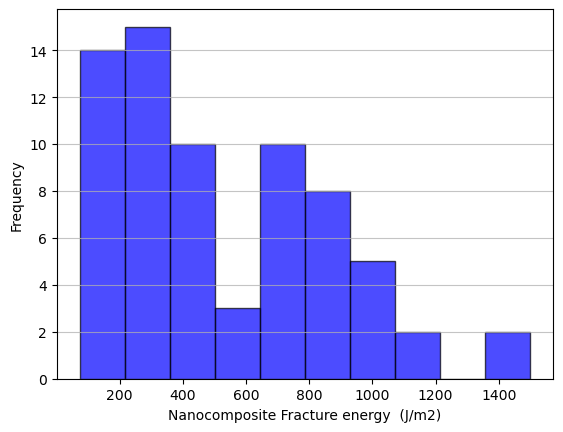

Minimum value: 73.0 J/m2
Maximum value: 1500.0 J/m2


In [22]:
# Plotting the histogram for the 'Nanocomposite Fracture energy  (J/m2)' column
plt.hist(df['Nanocomposite Fracture energy  (J/m2)'], bins=10, alpha=0.7, color='blue', edgecolor='black')

# Setting labels and grid
plt.xlabel('Nanocomposite Fracture energy  (J/m2)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Finding min and max values of the column
min_value = df['Nanocomposite Fracture energy  (J/m2)'].min()
max_value = df['Nanocomposite Fracture energy  (J/m2)'].max()

# Displaying the plot
plt.show()

# Printing the min and max values
print(f"Minimum value: {min_value} J/m2")
print(f"Maximum value: {max_value} J/m2")

# 2. Model Selection 
1. Linear Regression: Good for understanding relationships between variables but may underperform if relationships are non-linear.
2. Random Forest: Handles non-linear data well and is robust to overfitting but can be computationally intensive.
3. Decision Tree: Easy to interpret but prone to overfitting.
4. XGBoost: Often performs very well in practice but can be prone to overfitting and requires careful tuning.

In [15]:
# Define the kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Initialize the GaussianProcessRegressor
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)




In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.svm import SVR

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "SVM": SVR()
}
models["Gaussian Process"] = gp_model
# Function to calculate metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    metrics = {
        'Training': {
            'R2': r2_score(y_train, train_predictions),
            'MAE': mean_absolute_error(y_train, train_predictions),
            'MSE': mean_squared_error(y_train, train_predictions),
            'RMSE': np.sqrt(mean_squared_error(y_train, train_predictions))
        },
        'Testing': {
            'R2': r2_score(y_test, test_predictions),
            'MAE': mean_absolute_error(y_test, test_predictions),
            'MSE': mean_squared_error(y_test, test_predictions),
            'RMSE': np.sqrt(mean_squared_error(y_test, test_predictions))
        }
    }
    return metrics

# Training and Evaluating Models
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# Organizing results into DataFrames
all_rows = []
training_rows = []
testing_rows = []

for model_name, metrics in results.items():
    for dataset_type, dataset_metrics in metrics.items():
        row = {
            'Model': model_name,
            'Dataset': dataset_type,
            'R2': dataset_metrics['R2'],
            'MAE': dataset_metrics['MAE'],
            'MSE': dataset_metrics['MSE'],
            'RMSE': dataset_metrics['RMSE']
        }
        all_rows.append(row)
        if dataset_type == 'Training':
            training_rows.append(row)
        elif dataset_type == 'Testing':
            testing_rows.append(row)

# Creating DataFrames
results_df = pd.DataFrame(all_rows)
training_results_df = pd.DataFrame(training_rows)
testing_results_df = pd.DataFrame(testing_rows)

# Displaying the results as tables
print("All Results:\n", results_df, "\n")
print("Training Results:\n", training_results_df, "\n")
print("Testing Results:\n", testing_results_df)

Evaluating Linear Regression...
Evaluating Random Forest...
Evaluating Decision Tree...
Evaluating XGBoost...
Evaluating SVM...
Evaluating Gaussian Process...
All Results:
                 Model   Dataset        R2         MAE            MSE  \
0   Linear Regression  Training  0.671612  155.558454   35767.721023   
1   Linear Regression   Testing  0.732139  123.068223   27682.711446   
2       Random Forest  Training  0.982103   29.878712    1949.298671   
3       Random Forest   Testing  0.849929   97.303634   15509.406381   
4       Decision Tree  Training  1.000000    0.000000       0.000000   
5       Decision Tree   Testing  0.849779   82.693930   15524.971563   
6             XGBoost  Training  1.000000    0.003576       0.000025   
7             XGBoost   Testing  0.818608   99.035545   18746.357323   
8                 SVM  Training -0.186651  268.793121  129248.854250   
9                 SVM   Testing -0.020448  262.234878  105460.653121   
10   Gaussian Process  Training  1.

C:\Users\z5025827\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


## 3. Model Evaluation

In [17]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Example of using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} Cross-Validation R2 Scores: {scores}")

# Example of hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search.best_params_)

Linear Regression Cross-Validation R2 Scores: [0.53352021 0.32610512 0.60165061 0.45269749 0.72191878]
Random Forest Cross-Validation R2 Scores: [0.89331216 0.95487181 0.88095692 0.69607929 0.89764352]
Decision Tree Cross-Validation R2 Scores: [0.76152631 0.76975579 0.93492282 0.82582199 0.91119298]
XGBoost Cross-Validation R2 Scores: [0.86528283 0.90404723 0.89018813 0.7524982  0.82077723]


C:\Users\z5025827\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\z5025827\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\z5025827\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\z5025827\AppData\Lo

Gaussian Process Cross-Validation R2 Scores: [-1.53406617  0.70913052 -1.48349082 -2.51388987  0.62561233]
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 300}


# 4. Model Interpretation

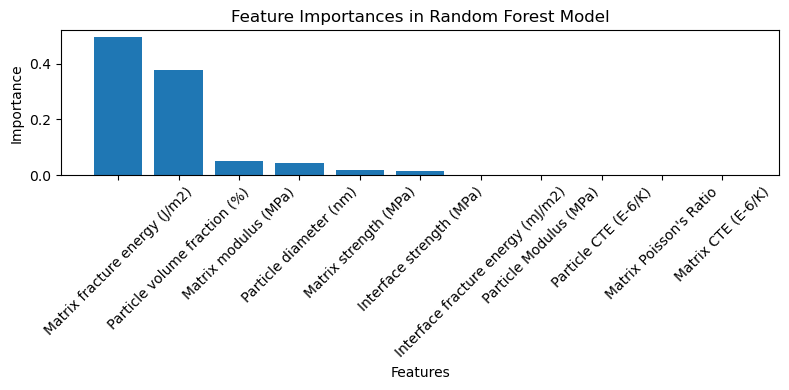

In [18]:
import matplotlib.pyplot as plt

#  Random Forest is already trained
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
importances = rf_model.feature_importances_

# Sorting the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Creating labels for the plot
labels = [X_train.columns[i] for i in sorted_indices]

# Creating the plot
plt.figure(figsize=(8, 4))
plt.title("Feature Importances in Random Forest Model")
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), labels, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


# 5. Final Model Selection

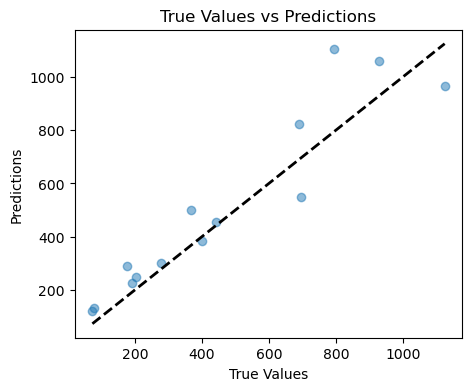

In [19]:
import matplotlib.pyplot as plt

# Predictions from the Decision Tree model
predictions_dt = rf_model.predict(X_test)

# Plotting Predicted vs True values
plt.figure(figsize=(5, 4))
plt.scatter(y_test, predictions_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()



# 6.Potential insights from the model

# Supplementary 

## Understand the distribution of each feature and target vairable

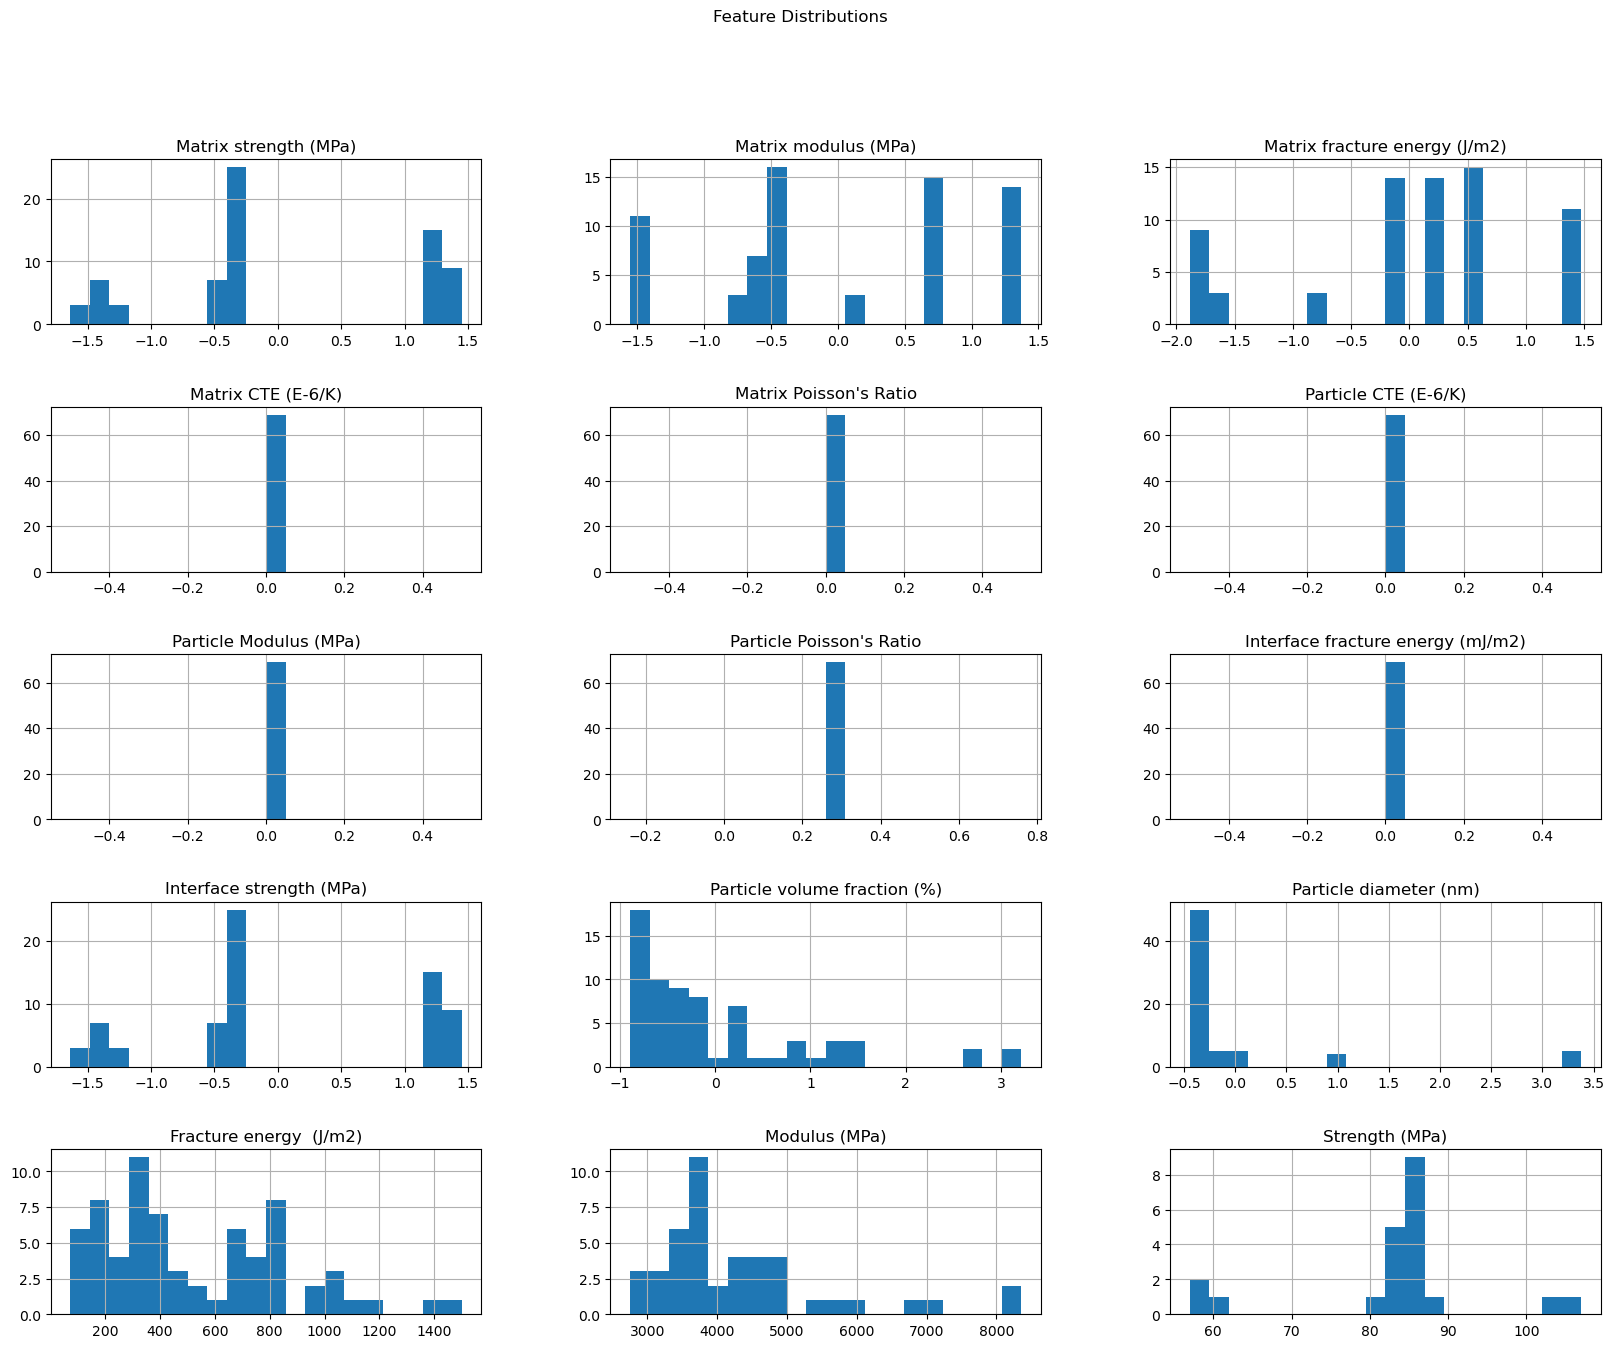

Text(0, 0.5, 'Frequency')

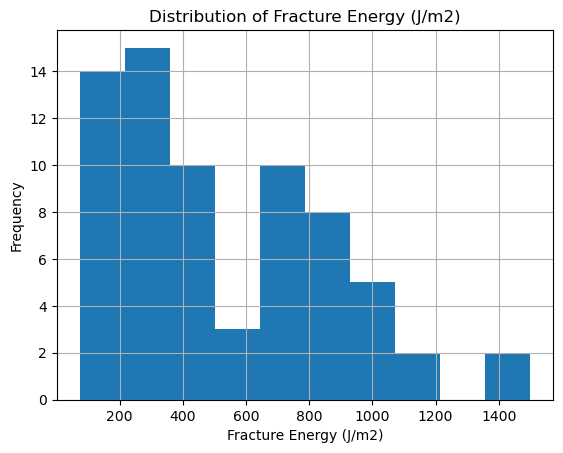

In [10]:
# Adjust the layout size to fit all features
df.hist(bins=20, figsize=(20, 15), layout=(5, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust the spacing a bit more if needed
plt.suptitle('Feature Distributions')
plt.show()

# Histogram for the target variable remains the same
df[['Fracture energy  (J/m2)']].hist(bins=10)
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust the spacing
plt.title('Distribution of Fracture Energy (J/m2)')
plt.xlabel('Fracture Energy (J/m2)')
plt.ylabel('Frequency')


In [11]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')

ValueError: could not convert string to float: 'DGEBA+accelerated methylhexahydrophthalic acid anhydride Tg 153°C'